# Proyek Analisis Data : [Input Nama Dataset]


*   Nama        : Sherly Dwi Puspita
*   Email       : sherlydwipuspita15@gmail.com
*   ID Dicoding : sherly_14

# Menentukan Pertanyaan Bisnis

*   Bagaimana pola distribusi jumlah pengguna sepeda berdasarkan jam dalam sehari?
*   Berapa persentase rata-rata pengguna terdaftar (registered) dibandingkan dengan pengguna biasa (casual) dalam satu tahun?
*   Bagaimana tren perubahan jumlah penyewaan sepeda dari tahun ke tahun?
*   Faktor apa saja yang paling signifikan mempengaruhi peningkatan jumlah pengguna sepeda selama musim tertentu?











# Import Semua Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

### Gathering Data

In [4]:
# Memuat tabel day
day_df = pd.read_csv("https://raw.githubusercontent.com/SherlyDwiPuspita/Proyek-Analisis-Data-Dicoding/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Memuat tabel hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/SherlyDwiPuspita/Proyek-Analisis-Data-Dicoding/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data yang digunakan dalam proses analisis terdiri dari dua tabel utama, yaitu day dan hour yang masing-masing memuat informasi peminjaman sepeda berdasarkan hari dan jam.
- Tabel day memberikan gambaran umum mengenai jumlah peminjaman sepeda harian, serta faktor-faktor seperti cuaca, suhu, dan hari dalam seminggu yang mungkin mempengaruhi tren penggunaan.
- Tabel hour memungkinkan analisis lebih mendetail tentang tren peminjaman sepeda pada waktu-waktu tertentu, seperti lonjakan peminjaman pada jam-jam sibuk atau penurunan pada malam hari.

# Assesing Data

### Menilai Data day_df

In [6]:
# Memeriksa tipe data dari tiap kolom yang terdapat dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Menampilkan informasi jumlah missing value pada day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# Memeriksa duplikasi pada day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# menampilkan ringkasan parameter statistik pada day_df
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai Data hour_df

In [9]:
# Memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Menampilkan informasi jumlah missing value pada hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
# Memeriksa duplikasi pada hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# menampilkan ringkasan parameter statistik pada hour_df
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset day_df terdiri dari 731 entri dan memiliki tipe data yang sesuai di setiap kolom, tanpa missing values maupun nilai yang duplikat.
- Begitu pula pada hour_df dari 17379 entri sudah memiliki tipe data yang sesuai di setiap kolom, tanpa missing values maupun nilai yang duplikat yang menjamin keunikan setiap entri.

# Cleaning Data

### Membersihkan Data day_df

In [12]:
# menghapus kolom yang tidak relevan seperti 'instant'
day_df.drop(columns=['instant'], inplace=True)

In [13]:
# Mengubah beberapa nama kolom agar lebih jelas dan mudah dibaca
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count',
    'hum':'humidity'
}, inplace=True)

In [14]:
# Mengubah beberapa kolom menjadi kategorikal
day_df['season'] = day_df['season'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

# Mengubah kolom 'dateday' menjadi tipe datetime
day_df['dateday'] = pd.to_datetime(day_df['dateday'])


In [15]:
# Mengganti nilai numerik menjadi keterangan
day_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
day_df['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}, inplace=True)
day_df['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)
day_df['year'].replace({0: '2011', 1: '2012'}, inplace=True)
day_df['holiday'].replace({0: 'No Holiday', 1: 'Holiday'}, inplace=True)
day_df['workingday'].replace({0: 'Non-working day', 1: 'Working day'}, inplace=True)
day_df.head()

<ipython-input-15-b355bc982920>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
<ipython-input-15-b355bc982920>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,No Holiday,Sat,Non-working day,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,No Holiday,Sun,Non-working day,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,No Holiday,Mon,Working day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No Holiday,Tue,Working day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No Holiday,Wed,Working day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Membersihkan Data hour_df

In [16]:
# menghapus kolom yang tidak relevan seperti 'instant' pada hour_df
hour_df.drop(columns=['instant'], inplace=True)

In [17]:
# Mengubah beberapa nama kolom agar lebih jelas dan mudah dibaca pada hour_df
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count',
    'hum':'humidity'
}, inplace=True)

In [18]:
# Mengubah beberapa kolom menjadi kategorikal di hour_df
hour_df['season'] = hour_df['season'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

# Mengubah kolom 'dateday' menjadi tipe datetime pada hour_df
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])

In [19]:
# Mengganti nilai numerik menjadi keterangan pada hour_df
hour_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
hour_df['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}, inplace=True)
hour_df['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)
hour_df['year'].replace({0: '2011', 1: '2012'}, inplace=True)
hour_df['holiday'].replace({0: 'No Holiday', 1: 'Holiday'}, inplace=True)
hour_df['workingday'].replace({0: 'Non-working day', 1: 'Working day'}, inplace=True)
hour_df.head()

<ipython-input-19-bbbafadeac81>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
<ipython-input-19-bbbafadeac81>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,No Holiday,Sat,Non-working day,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No Holiday,Sat,Non-working day,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No Holiday,Sat,Non-working day,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No Holiday,Sat,Non-working day,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No Holiday,Sat,Non-working day,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahap cleaning data ini dilakukan penghapusan kolom yang tidak relevan seperti "instant" pada kedua tabel ini dan beberapa nama kolom diubah agar lebih deskriptif dan mudah dibaca.
- Pada tahap ini juga dilakukan pengubahan beberapa kolom menjadi kategorikal karena kolom-kolom tersebut hanya memiliki beberapa nilai unik (varian).
- Mengubah kolom 'dateday' menjadi tipe date time agar data dapat digunakan untuk analisis berbasis waktu, seperti tren musiman.
- Selain itu, nilai numerik pada beberapa kolom diganti dengan keterangan yang lebih informatif.

# Exploratory Data Analysis (EDA)

### Eksplorasi day_df

In [20]:
day_df.describe(include="all")

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,No Holiday,Sun,Working day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [21]:
# Menghitung total pengguna registered dan casual dan persentasenya
day_df.groupby(by='year').agg({
    'registered': ['sum'],
    'casual': ['sum'],
    'count': ['sum']
})

,registered,casual,count
,sum,sum,sum
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


In [22]:
## Tren penyewaan sepeda dari tahun ke tahun
day_df.groupby(by='year')['count'].sum().reset_index()

,year,count
0,2011,1243103
1,2012,2049576


In [23]:
day_df.groupby(by="season")['count'].sum().sort_values(ascending=False).reset_index()

<ipython-input-23-ce92e04998bc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season")['count'].sum().sort_values(ascending=False).reset_index()


,season,count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


### Eksplorasi hour_df

In [24]:
hour_df.describe(include="all")

,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,No Holiday,Sat,Working day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [25]:
# Distribusi jumlah pengguna sepeda per jam
hour_df.groupby('hr')['count'].sum().reset_index()

,hr,count
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


**Insight:**
- Data menunjukkan jumlah penyewaan sepeda yang bervariasi sepanjang hari, dengan puncak penggunaan terjadi pada jam-jam tertentu (terutama antara jam 17:00 hingga 19:00), dan penurunan signifikan di jam-jam awal pagi.
- Terdapat perbandingan yang jelas antara pengguna registered dan casual. Pengguna registered lebih banyak dan terus meningkat setiap tahunnya
- Terdapat peningkatan jumlah penyewaan sepeda yang signifikan dari tahun 2011 ke 2012, menunjukkan pertumbuhan yang baik dalam penggunaan sepeda.
- Musim gugur adalah musim dengan penyewaan tertinggi, diikuti oleh musim panas dan sedangkan musim dingin juga menunjukkan angka yang cukup tinggi,

# Visualization & Explanatory Analysis

### Pertanyaan ke-1 : Bagaimana pola distribusi jumlah pengguna sepeda berdasarkan jam dalam sehari?

<ipython-input-31-eac833b7e34a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hr', y='count', data=hour_df, palette='GnBu', ci=None)
<ipython-input-31-eac833b7e34a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='count', data=hour_df, palette='GnBu', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pas

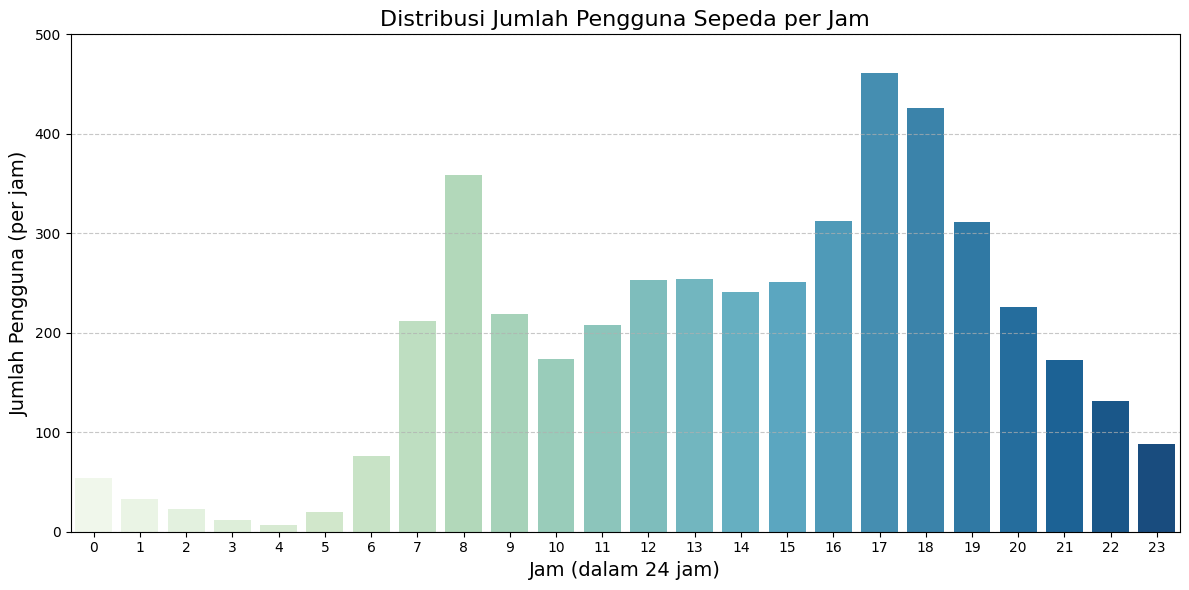

In [31]:
# Membuat visualisasi distribusi jumlah pengguna sepeda per jam
plt.figure(figsize=(12, 6))

# Barplot untuk jumlah pengguna berdasarkan jam, menggunakan palet warna 'coolwarm'
sns.barplot(x='hr', y='count', data=hour_df, palette='GnBu', ci=None)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Jumlah Pengguna Sepeda per Jam', fontsize=16)
plt.xlabel('Jam (dalam 24 jam)', fontsize=14)
plt.ylabel('Jumlah Pengguna (per jam)', fontsize=14)

# Mengatur batas sumbu y dan menambahkan grid
plt.ylim(0, 500)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan ke-2 : Berapa persentase rata-rata pengguna terdaftar (registered) dibandingkan dengan pengguna biasa (casual) dalam satu tahun?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-33-62aac17b5fe5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])


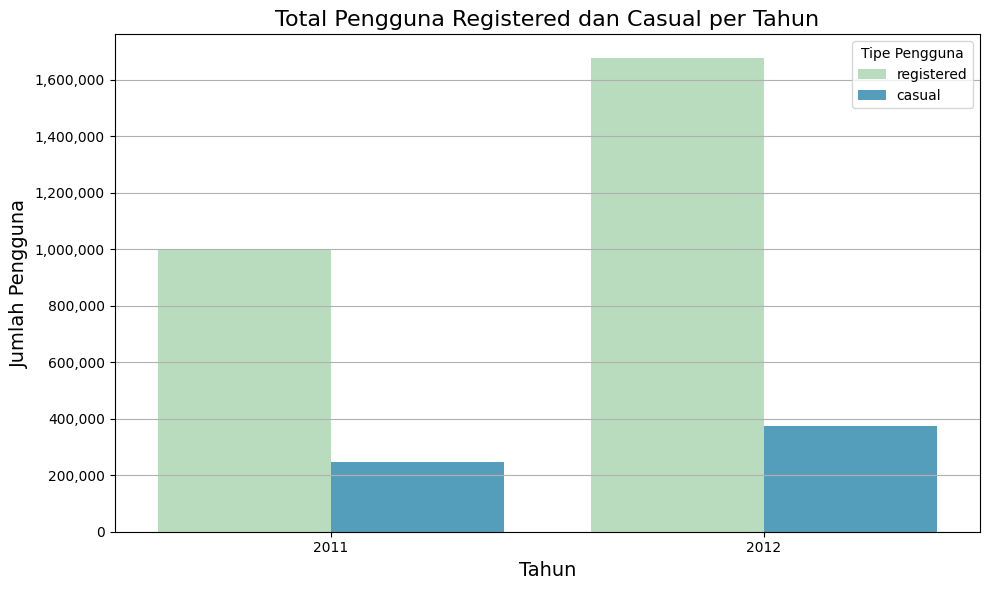

In [33]:
# Mengelompokkan data berdasarkan tahun dan menjumlahkan pengguna registered dan casual
total_users = day_df.groupby(by='year').agg({'registered': 'sum', 'casual': 'sum'}).reset_index()

# Mengubah data ke format long dengan pd.melt untuk visualisasi yang lebih mudah
total_users = pd.melt(total_users, id_vars='year', value_vars=['registered', 'casual'],
                      var_name='User Type', value_name='Count')

plt.figure(figsize=(10, 6))

# Membuat barplot untuk membandingkan jumlah pengguna registered dan casual per tahun
sns.barplot(x='year', y='Count', hue='User Type', data=total_users, palette='GnBu')

# Menambahkan judul dan label sumbu
plt.title('Total Pengguna Registered dan Casual per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)

# Menambahkan legenda untuk membedakan antara pengguna registered dan casual
plt.legend(title='Tipe Pengguna')

# Menambahkan grid pada sumbu y untuk membantu interpretasi data
plt.grid(axis='y')

# Mengubah tampilan nilai sumbu Y menjadi bilangan bulat tanpa koma
y_ticks = plt.gca().get_yticks().astype(int)
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Mengatur layout agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

### Pertanyaan ke-3 : Bagaimana tren perubahan jumlah penyewaan sepeda dari tahun ke tahun?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


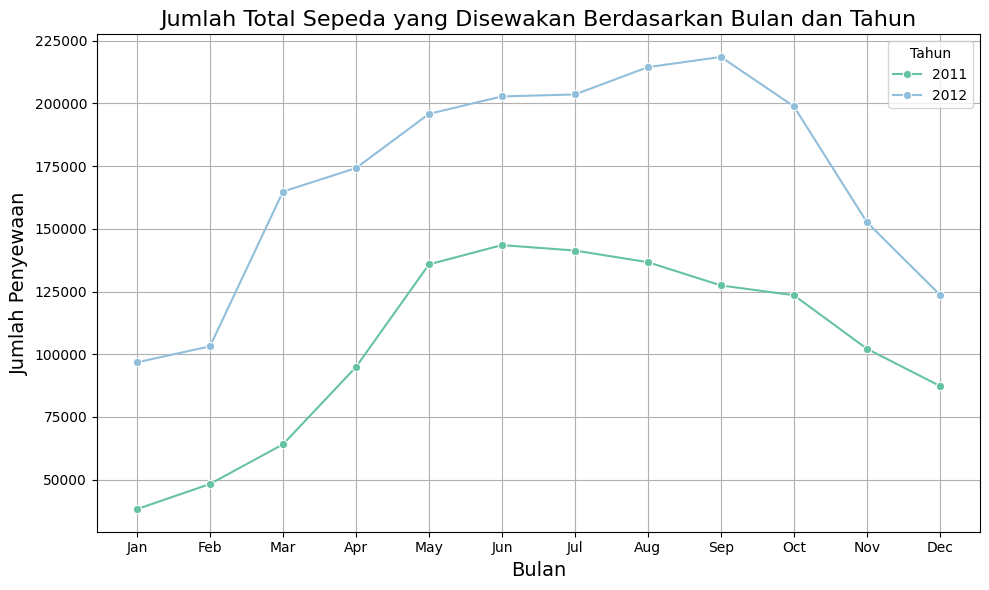

In [36]:
# Visualisasi tren penyewaan sepeda berdasarkan bulan dan tahun
# Mengelompokkan data untuk mendapatkan jumlah penyewaan per bulan dan tahun
monthly_rentals = day_df.groupby(['year', 'month'])['count'].sum().reset_index()

# Mengatur urutan bulan untuk visualisasi
monthly_rentals['month'] = pd.Categorical(monthly_rentals['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
plt.figure(figsize=(10, 6))

# Membuat lineplot untuk menunjukkan tren penyewaan berdasarkan bulan dan tahun
colors = ['#66c2a5', '#91bfdb']
sns.lineplot(x='month', y='count', hue='year', data=monthly_rentals, marker='o', palette=colors)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Total Sepeda yang Disewakan Berdasarkan Bulan dan Tahun', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)

# Menambahkan grid dan legend
plt.grid(True)
plt.legend(title='Tahun', loc='upper right')

# Mengatur layout agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()


### Pertanyaan ke-4 : Faktor apa saja yang paling signifikan mempengaruhi peningkatan jumlah pengguna sepeda selama musim tertentu?

<ipython-input-39-424be6ce1dca>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=season_counts.index, y=season_counts.values, palette=palette_colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

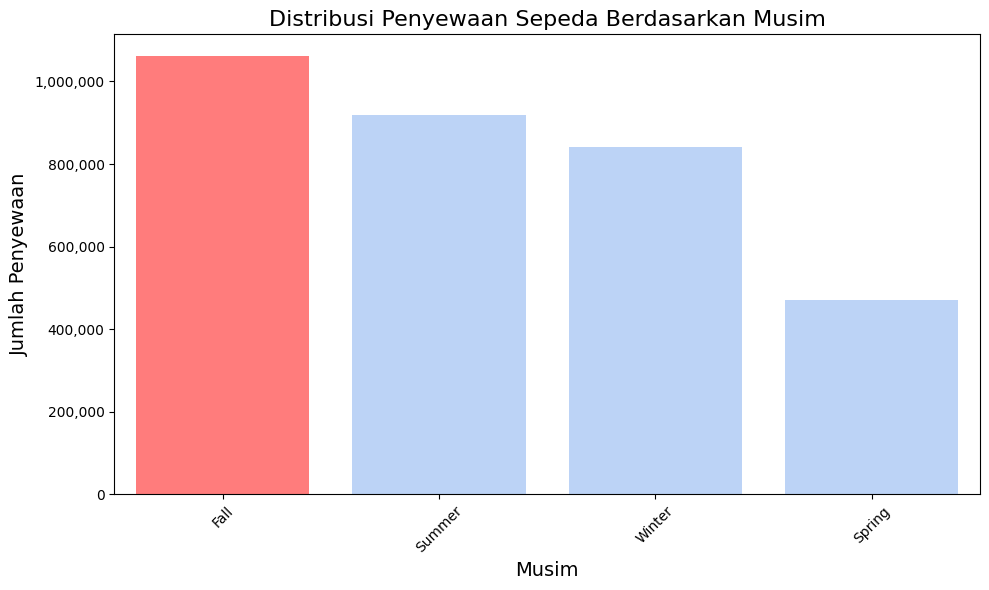

In [39]:


# Membuat Series untuk jumlah penyewaan per musim dan mengurutkannya
season_counts = pd.Series({
    'Fall': 1061129,
    'Summer': 918589,
    'Winter': 841613,
    'Spring': 471348
}).sort_values(ascending=False)

plt.figure(figsize=(10, 6))

# Mendefinisikan palet warna pastel untuk visualisasi
palette_colors = ['#d7e7ff', '#b3d1ff', '#b3d1ff', '#b3d1ff']

# Membuat barplot untuk menampilkan jumlah penyewaan per musim
bars = sns.barplot(x=season_counts.index, y=season_counts.values, palette=palette_colors)

# Menentukan musim dengan jumlah penyewaan tertinggi
highest_season = season_counts.idxmax()

# Mengubah warna batang untuk musim dengan penyewaan tertinggi
for i, bar in enumerate(bars.patches):
    if season_counts.index[i] == highest_season:
        bar.set_facecolor('#ff7c7c')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)

# Mengubah tampilan nilai sumbu Y menjadi bilangan bulat tanpa koma
y_ticks = plt.gca().get_yticks().astype(int)
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Mengatur format sumbu X dan layout agar lebih rapi
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**
- Berdasarkan visualisasi jumlah pengguna sepeda per jam, terlihat bahwa puncak penggunaan terjadi pada pukul 08.00 dan 17.00. Penggunaan sepeda menurun drastis pada tengah malam hingga dini hari, dan mulai meningkat lagi pada pagi hari. Jadi dari sini di ketahui layanan sepeda lebih sering digunakan selama jam sibuk kerja dibandingkan waktu lainnya.
- Dari hasil visualisasi, terlihat bahwa jumlah pengguna terdaftar (registered) jauh lebih banyak dibandingkan pengguna kasual pada tahun 2011 dan 2012. Jumlah pengguna terdaftar meningkat signifikan pada 2012, sementara pengguna kasual tetap relatif stabil.
- Pada hasil visualisasi jumlah penyewaan sepeda meningkat dari bulan Januari hingga puncaknya pada bulan Juli di kedua tahun (2011 dan 2012), lalu menurun pada bulan-bulan berikutnya hingga Desember. Tahun 2012 memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan 2011, dengan pola musiman yang serupa.
- Dari grafik menunjukkan bahwa penyewaan sepeda paling tinggi terjadi di musim gugur/fall, mendekati 1.000.000 penyewaan. Musim panas dan musim dingin memiliki jumlah penyewaan yang hampir sama, tetapi sedikit lebih rendah. Musim semi mencatat jumlah penyewaan terendah, mungkin karena faktor cuaca yang kurang menguntungkan. Secara keseluruhan, pola penyewaan sepeda dipengaruhi oleh kondisi cuaca di setiap musim.

# Analisis Lanjutan dengan RFM Analysis

In [40]:
# Melakukan Teknik Anaisis RFM
# Tanggal referensi adalah hari terakhir dalam dataset
reference_date = day_df['dateday'].max()

# Menghitung Recency: jumlah hari sejak sepeda terakhir kali digunakan
day_df['Recency'] = (reference_date - day_df['dateday']).dt.days

# Menghitung Frequency: seberapa sering sepeda digunakan (berdasarkan total pengguna `count`)
frequency_df = day_df.groupby('dateday')['count'].sum().reset_index()
frequency_df.columns = ['dateday', 'Frequency']

# Menghitung Monetary: total pengguna terdaftar (`registered` diasumsikan sebagai pengguna yang membayar)
monetary_df = day_df.groupby('dateday')['registered'].sum().reset_index()
monetary_df.columns = ['dateday', 'Monetary']

# Menggabungkan metrik RFM ke dalam satu DataFrame
rfm_df = day_df[['dateday', 'Recency']].merge(frequency_df, on='dateday').merge(monetary_df, on='dateday')

# Menampilkan DataFrame RFM
print(rfm_df.head())


     dateday  Recency  Frequency  Monetary
0 2011-01-01      730        985       654
1 2011-01-02      729        801       670
2 2011-01-03      728       1349      1229
3 2011-01-04      727       1562      1454
4 2011-01-05      726       1600      1518


<ipython-input-41-a5b325e9b0bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="dateday", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/s

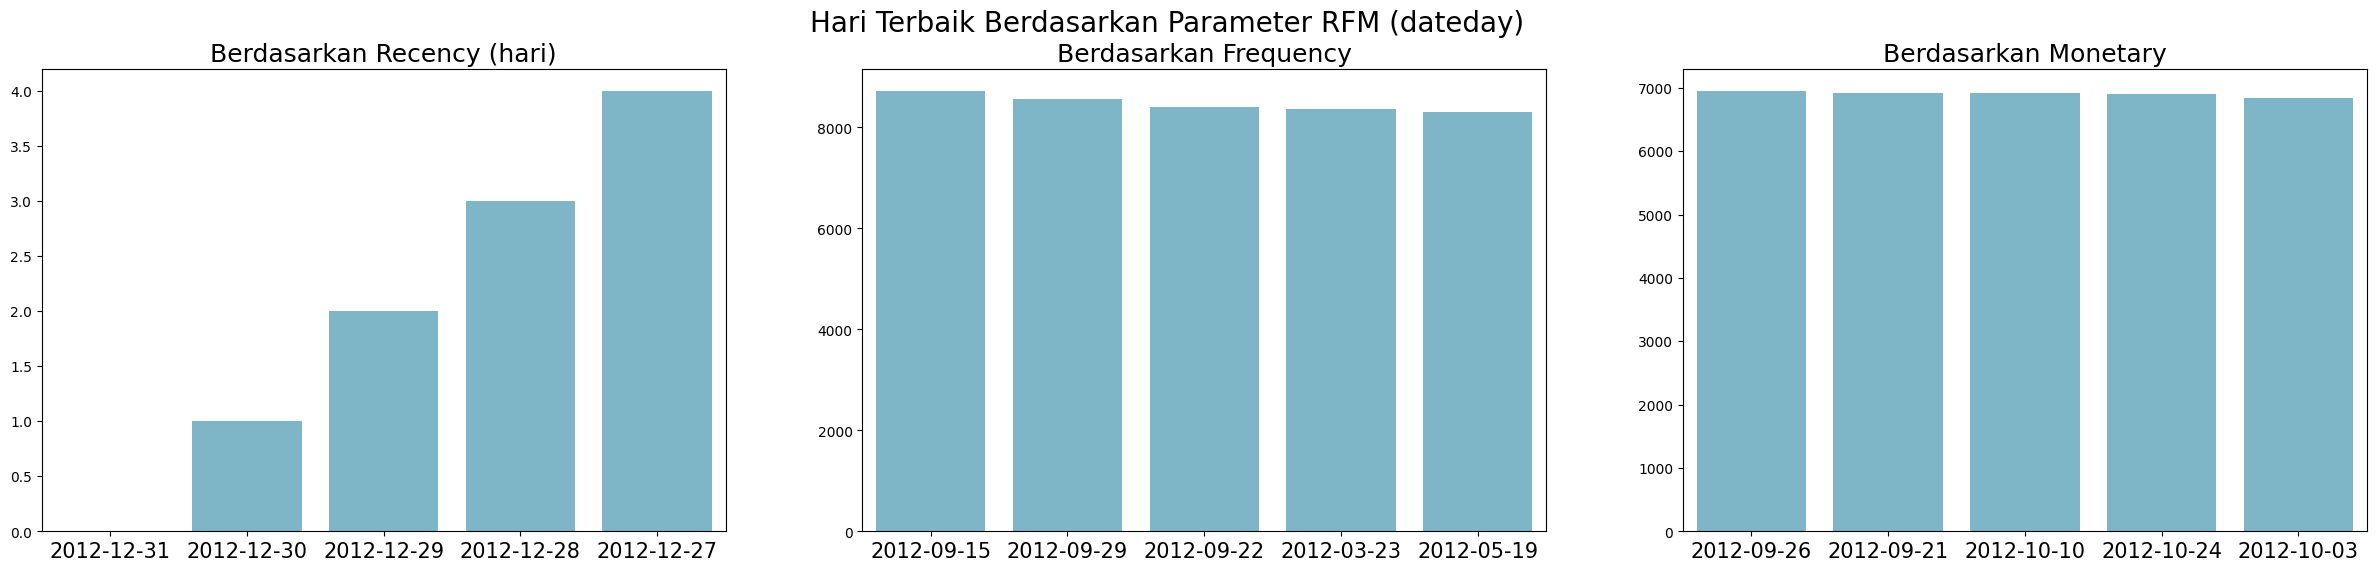

In [41]:
# Visualisasi Hari Terbaik Berdasarkan Parameter RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Mendefinisikan warna untuk diagram batang
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Plot untuk Recency
sns.barplot(y="Recency", x="dateday", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Plot untuk Frequency
sns.barplot(y="Frequency", x="dateday", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Plot untuk Monetary
sns.barplot(y="Monetary", x="dateday", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Menambahkan judul utama untuk semua plot
plt.suptitle("Hari Terbaik Berdasarkan Parameter RFM (dateday)", fontsize=20)

# Menampilkan plot
plt.show()


# Conclusion

1.   Kesimpulan Pertanyaan 1:
Bagaimana pola distribusi jumlah pengguna sepeda berdasarkan jam dalam sehari?
Hasil visualisasi grafik distribusi menunjukkan bahwa penggunaan sepeda tertinggi terjadi pada dua periode utama, yaitu pagi hari sekitar pukul 7-9 dan sore hari sekitar pukul 17-18, yang kemungkinan besar terkait dengan aktivitas berangkat dan pulang dari kegiatan. Di luar periode ini, penggunaan cenderung lebih rendah, terutama pada dini hari dan malam setelah pukul 22. Hal ini menunjukkan bahwa sepeda tidak terlalu banyak digunakan untuk aktivitas santai atau rekreasi pada malam atau dini hari.

2.   Kesimpulan Pertanyaan 2:
Berapa persentase rata-rata pengguna terdaftar (registered) dibandingkan dengan pengguna biasa (casual) dalam satu tahun?
Dari hasil visualisasi, grafik menunjukkan bahwa jumlah pengguna terdaftar (registered) jauh lebih banyak dibandingkan dengan pengguna biasa (casual) pada kedua tahun yang ditampilkan, yaitu 2011 dan 2012. Pada tahun 2012, jumlah pengguna casual mengalami peningkatan yang cukup signifikan dibandingkan tahun 2011, sementara jumlah pengguna terdaftar meningkat lebih sedikit. Hal ini mengindikasikan adanya minat yang meningkat dari pengguna casual, meskipun pengguna terdaftar tetap mendominasi jumlah keseluruhan.

3.   Kesimpulan Pertanyaan 3:
Bagaimana tren perubahan jumlah penyewaan sepeda dari tahun ke tahun?
Dari hasil grafik, terlihat bahwa jumlah sepeda yang disewa meningkat secara bertahap dari Januari hingga mencapai puncak pada bulan Juli dan Agustus, kemudian menurun kembali hingga Desember. Pada tahun 2012, jumlah penyewaan jauh lebih tinggi dibandingkan tahun 2011 di setiap bulannya. Ini menunjukkan adanya tren pertumbuhan yang signifikan dalam penggunaan sepeda dari tahun ke tahun, terutama pada pertengahan tahun, di mana penyewaan mencapai angka tertinggi.

4.   Kesimpulan Pertanyaan 4:
Faktor apa saja yang paling signifikan mempengaruhi peningkatan jumlah pengguna sepeda selama musim tertentu?
Berdasarkan grafik distribusi penyewaan sepeda berdasarkan musim, dapat disimpulkan bahwa jumlah penyewaan tertinggi terjadi pada musim gugur (Fall), diikuti oleh musim panas (Summer) dan musim dingin (Winter), dengan musim semi (Spring) memiliki jumlah penyewaan terendah. Hal ini menunjukkan bahwa cuaca yang lebih hangat cenderung meningkatkan aktivitas penyewaan sepeda, meskipun musim gugur memiliki daya tarik tersendiri yang mampu melebihi penyewaan di musim panas.




